# **Notebook 3.4 -- Activation functions**

The purpose of this practical is to experiment with different activation functions. <br>

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [14]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [15]:
# Sinir ağının çıktısını çizen fonksiyon
# Girdi aralığı [0,1], çıktı aralığı [-1,1] olarak alınmış
# Eğer plot_all=True olursa, gizli katmandaki ara adımları da (preactivation, activation, weighted activation) çizer
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3,
                w_act_1, w_act_2, w_act_3, plot_all=False,
                x_data=None, y_data=None):

  # Eğer plot_all True ise tüm ara aşamaları göster
  if plot_all:
    # 3x3 boyutunda 9 tane küçük grafik oluşturuyoruz
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)     # Grafiğin boyutunu ayarlıyoruz
    fig.tight_layout(pad=3.0)         # Grafiklerin arasındaki boşluğu ayarlıyoruz

    # --- 1. satır: preactivation değerlerini çiziyoruz (gizli katmana gelen toplam giriş) ---
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')

    # --- 2. satır: aktivasyon fonksiyonunun çıktılarını çiziyoruz ---
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')

    # --- 3. satır: ağırlıklarla çarpılmış aktivasyon değerlerini çiziyoruz ---
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    # Her alt grafiğin eksen ayarlarını yapıyoruz
    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1])        # x ekseni 0 ile 1 arasında
        ax[plot_x,plot_y].set_ylim([-1,1])       # y ekseni -1 ile 1 arasında
        ax[plot_y,plot_x].set_aspect(0.5)        # Eksenlerin oranını ayarlıyoruz
      ax[2,plot_y].set_xlabel('Girdi, x')        # Alt satırdaki grafiklere x etiketi ekliyoruz
    plt.show()                                   # Tüm grafikleri gösteriyoruz

  # Eğer plot_all False ise sadece genel giriş-çıkış grafiğini çiziyoruz
  fig, ax = plt.subplots()
  ax.plot(x,y)                                   # Ağın çıktısını çiz
  ax.set_xlabel('Girdi, x'); ax.set_ylabel('Çıktı, y')
  ax.set_xlim([0,1]); ax.set_ylim([-1,1])        # Eksen aralıklarını ayarla
  ax.set_aspect(0.5)                             # Eksenlerin oranını koru (görsellik için)

  # Eğer elimizde özel veri noktaları varsa (x_data, y_data) onları da göster
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')                # Mor noktalarla veri noktalarını göster
    for i in range(len(x_data)):                 # Her bir noktayı ayrı ayrı da çiz
      ax.plot(x_data[i], y_data[i],)
  plt.show()                                     # Grafiği ekrana bastır


In [16]:
# 1 giriş, 1 çıkış ve 3 gizli nöron (hidden unit) olan basit bir sinir ağı tanımlıyoruz
def shallow_1_1_3(x, activation_fn,
                  phi_0, phi_1, phi_2, phi_3,       # çıkış katmanındaki ağırlık ve bias değerleri
                  theta_10, theta_11,               # 1. gizli nöronun parametreleri
                  theta_20, theta_21,               # 2. gizli nöronun parametreleri
                  theta_30, theta_31):              # 3. gizli nöronun parametreleri

  # --- GİZLİ KATMAN (preactivation hesaplama) ---
  # Her gizli nöronun girişine gelen toplamı hesaplıyoruz: (bias + ağırlık * x)
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # --- AKTİVASYON FONKSİYONU ---
  # Hesapladığımız preactivation değerlerini seçilen aktivasyon fonksiyonundan geçiriyoruz
  # activation_fn parametresi olarak ReLU, sigmoid, heaviside vb. gelebilir
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # --- AĞIRLIKLI AKTİVASYONLAR ---
  # Her gizli nöronun çıktısını (aktivasyonunu) çıkış katmanındaki ağırlığı ile çarpıyoruz
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # --- ÇIKIŞ KATMANI ---
  # Sonuç: tüm gizli nöronların ağırlıklı çıktıları toplanıyor ve bir bias (phi_0) ekleniyor
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # --- ÇIKTI OLARAK TÜM HESAPLAMALARI DÖNDÜRÜYORUZ ---
  # Bu sayede hem ara değerleri (preactivation, activation) hem de nihai çıktıyı görebiliyoruz
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


In [17]:
# ReLU (Rectified Linear Unit) aktivasyon fonksiyonunu tanımlıyoruz
def ReLU(preactivation):
  # ReLU fonksiyonu negatif değerleri 0 yapar, pozitif değerleri aynen bırakır.
  # Yani: ReLU(x) = max(0, x)
  activation = preactivation.clip(0.0)  # numpy fonksiyonu "clip" negatifleri 0’a sabitler
  return activation                      # aktivasyon çıktısını geri döndürür


First, let's run the network with a ReLU functions

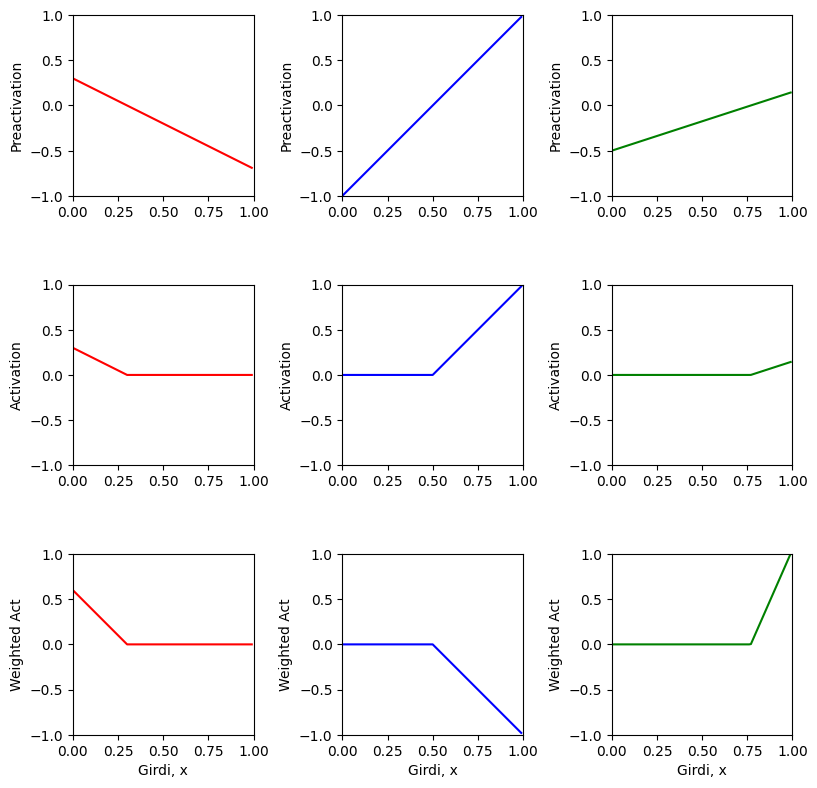

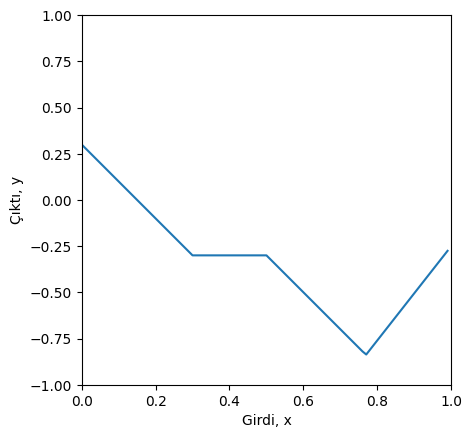

In [18]:
# Şimdi bazı parametreleri tanımlayalım ve sinir ağını çalıştıralım

# Gizli katmandaki 3 nöronun ağırlık ve bias değerleri (theta)
theta_10 =  0.3 ; theta_11 = -1.0   # 1. nöron: bias=0.3, ağırlık=-1.0
theta_20 = -1.0 ; theta_21 =  2.0   # 2. nöron: bias=-1.0, ağırlık=2.0
theta_30 = -0.5 ; theta_31 =  0.65  # 3. nöron: bias=-0.5, ağırlık=0.65

# Çıkış katmanındaki ağırlıklar ve bias (phi)
phi_0 = -0.3     # çıkış katmanındaki bias
phi_1 =  2.0     # 1. gizli nörondan gelen bağlantının ağırlığı
phi_2 = -1.0     # 2. gizli nörondan gelen bağlantının ağırlığı
phi_3 =  7.0     # 3. gizli nörondan gelen bağlantının ağırlığı

# Girdi değerlerini tanımlıyoruz (0'dan 1'e kadar 0.01 aralıklarla)
x = np.arange(0,1,0.01)

# Sinir ağını her bir x girdisi için çalıştırıyoruz
# Burada ReLU aktivasyon fonksiyonu kullanıyoruz
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU,
                  phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11,
                  theta_20, theta_21,
                  theta_30, theta_31)

# Son olarak ağın çıktısını ve ara değerlerini çiziyoruz
# plot_all=True olduğu için 9 tane küçük grafik (ara hesaplamalarla birlikte) gösterilecek
plot_neural(x, y, pre_1, pre_2, pre_3,
            act_1, act_2, act_3,
            w_act_1, w_act_2, w_act_3,
            plot_all=True)


# Sigmoid activation function

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f[z] = \frac{1}{1+\exp{[-10 z ]}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

In [19]:
# Sigmoid (lojistik) aktivasyon fonksiyonunu tanımlıyoruz
def sigmoid(preactivation):
  # Not: Şekillerle karşılaştırmak için katsayı 10 kullanıyoruz.
  # Sigmoid fonksiyonu genellikle: 1 / (1 + exp(-x)) şeklindedir
  # Burada x yerine preactivation geçiyor.
  # Katsayı 10, eğrinin daha dik görünmesini sağlar (görselleştirme için)

  activation = 1.0 / (1.0 + np.exp(-10.0 * preactivation))  # Sigmoid formülü
  return activation  # Aktivasyon çıktısını döndür


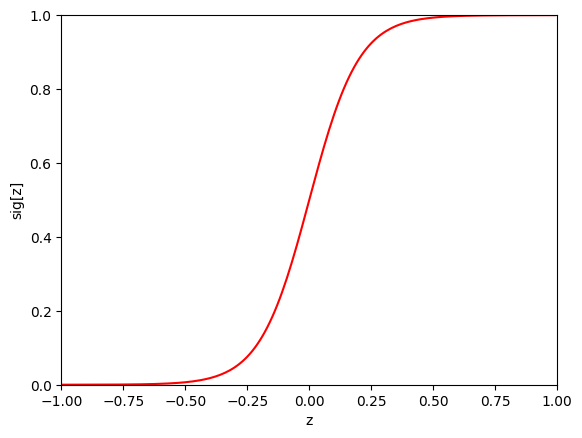

In [20]:
# Girdi değerlerinden bir dizi oluşturuyoruz
# -1 ile 1 arasında 0.01 aralıklarla değerler alıyoruz
z = np.arange(-1, 1, 0.01)

# Bu girdileri sigmoid fonksiyonundan geçiriyoruz
sig_z = sigmoid(z)   # her z değeri için sigmoid çıktısı hesaplanıyor

# Şimdi sigmoid fonksiyonunu grafikte gösterelim
fig, ax = plt.subplots()
ax.plot(z, sig_z, 'r-')         # kırmızı çizgiyle sigmoid eğrisi çiziliyor
ax.set_xlim([-1, 1])            # x eksenini -1 ile 1 arasında göster
ax.set_ylim([0, 1])             # y eksenini 0 ile 1 arasında göster
ax.set_xlabel('z')              # x ekseni etiketi
ax.set_ylabel('sig[z]')         # y ekseni etiketi (sigmoid çıktısı)
plt.show()                      # grafiği ekrana bastır


Let's see what happens when we use this activation function in a neural network

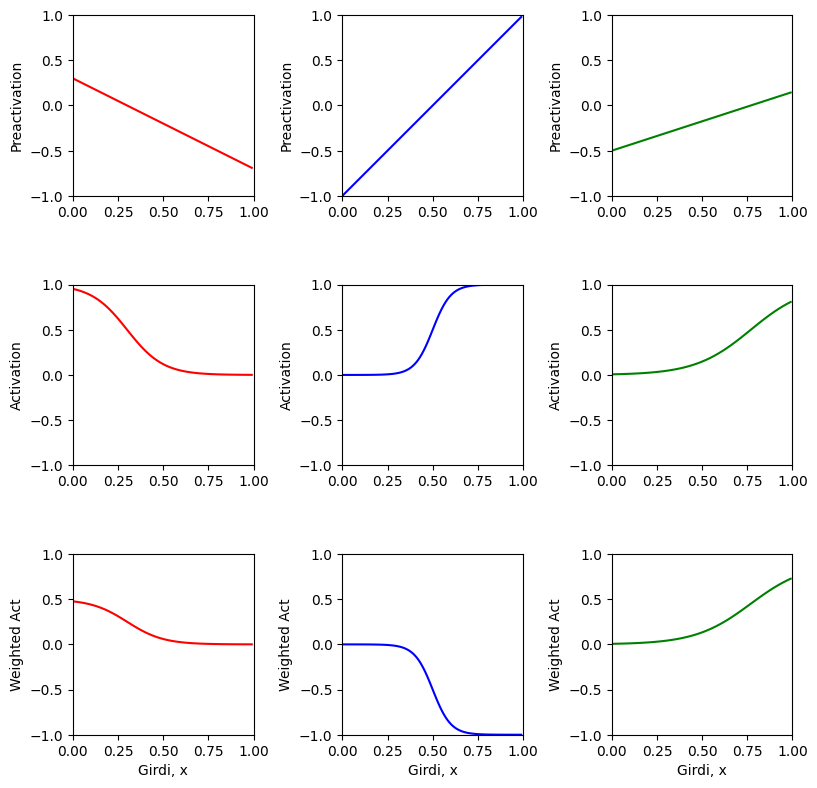

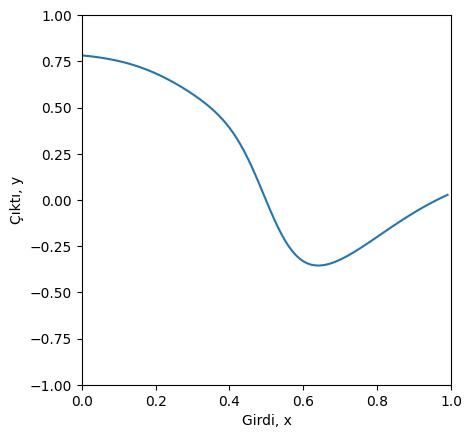

In [21]:
# Gizli katmandaki 3 nöronun parametreleri (bias ve ağırlıklar)
theta_10 =  0.3 ; theta_11 = -1.0   # 1. nöron
theta_20 = -1.0 ; theta_21 =  2.0   # 2. nöron
theta_30 = -0.5 ; theta_31 =  0.65  # 3. nöron

# Çıkış katmanının bias ve ağırlıkları
phi_0 = 0.3      # çıkış bias'ı
phi_1 = 0.5      # 1. nörondan çıkan aktivasyonun ağırlığı
phi_2 = -1.0     # 2. nörondan çıkan aktivasyonun ağırlığı
phi_3 = 0.9      # 3. nörondan çıkan aktivasyonun ağırlığı

# Girdi aralığı: 0'dan 1'e kadar 0.01 artışla değerler
x = np.arange(0, 1, 0.01)

# Sinir ağını her x için çalıştırıyoruz.
# Burada aktivasyon fonksiyonu olarak SIGMOID kullanıyoruz.
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid,
                  phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Sonuçları çizdiriyoruz.
# plot_all=True olduğu için:
#   1. satır: preactivation'lar,
#   2. satır: aktivasyonlar (sigmoid çıktısı),
#   3. satır: ağırlıklı aktivasyonlar,
# ve ayrıca ana grafikte y(x) eğrisi gösterilir.
plot_neural(x, y, pre_1, pre_2, pre_3,
            act_1, act_2, act_3,
            w_act_1, w_act_2, w_act_3,
            plot_all=True)


You probably notice that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

# Heaviside activation function

The Heaviside function is defined as:

\begin{equation}
\text{heaviside}[z] = \begin{cases} 0 & \quad z <0 \\ 1 & \quad z\geq 0\end{cases}
\end{equation}

In [22]:
# Heaviside (basamak) aktivasyon fonksiyonunu tanımlıyoruz
def heaviside(preactivation):
  # Bu fonksiyon girdi sıfırdan büyükse 1, küçükse 0 döndürür.
  # Yani: heaviside(x) = 0 (x<0) , 1 (x>=0)
  # Burada preactivation >= 0 koşulu True/False döndürür.
  # True = 1, False = 0 olarak çevirmek için .astype(int) kullanıyoruz.

  activation = (preactivation >= 0).astype(int)  # Boolean sonucu tam sayıya çeviriyoruz
  return activation  # Aktivasyon çıktısını döndür


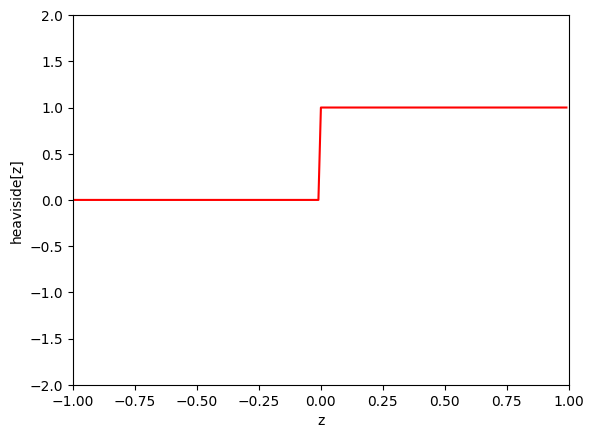

In [23]:
# -1 ile 1 arasında 0.01 artışlarla bir dizi girdi oluşturuyoruz
z = np.arange(-1, 1, 0.01)

# Bu girdileri heaviside (basamak) fonksiyonundan geçiriyoruz
heav_z = heaviside(z)

# Heaviside fonksiyonunu çizdiriyoruz
fig, ax = plt.subplots()
ax.plot(z, heav_z, 'r-')             # kırmızı çizgiyle fonksiyonu çiz
ax.set_xlim([-1, 1])                 # x eksenini -1 ile 1 arasında göster
ax.set_ylim([-2, 2])                 # y eksenini -2 ile 2 arasında göster (fazladan boşluk için)
ax.set_xlabel('z')                   # x eksenine etiket ekle
ax.set_ylabel('heaviside[z]')        # y eksenine etiket ekle
plt.show()                           # grafiği ekrana bastır


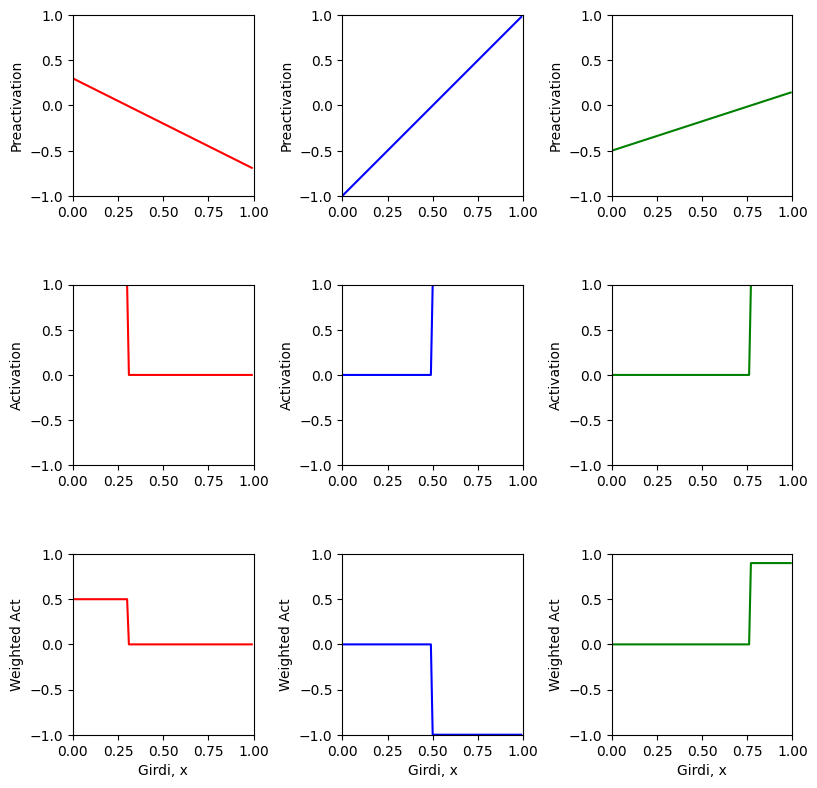

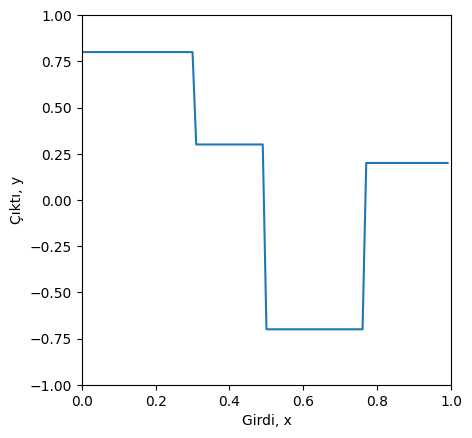

In [24]:
# Gizli katmandaki 3 nöronun parametreleri (bias ve ağırlıklar)
theta_10 =  0.3 ; theta_11 = -1.0   # 1. nöron
theta_20 = -1.0 ; theta_21 =  2.0   # 2. nöron
theta_30 = -0.5 ; theta_31 =  0.65  # 3. nöron

# Çıkış katmanının bias ve ağırlıkları
phi_0 = 0.3      # çıkış bias'ı
phi_1 = 0.5      # 1. nöronun aktivasyonuna ait ağırlık
phi_2 = -1.0     # 2. nöronun aktivasyonuna ait ağırlık
phi_3 = 0.9      # 3. nöronun aktivasyonuna ait ağırlık

# Girdi aralığı: 0'dan 1'e kadar 0.01 artışla değerler
x = np.arange(0, 1, 0.01)

# Sinir ağını her x için çalıştırıyoruz.
# Burada aktivasyon fonksiyonu olarak HEAVISIDE (basamak) kullanılıyor.
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside,
                  phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11,
                  theta_20, theta_21,
                  theta_30, theta_31)

# Sonuçları çizdiriyoruz.
# plot_all=True olduğu için 9 panelli grafik çıkacak:
#   1. satır: preactivation'lar (gizli nöron giriş toplamları)
#   2. satır: aktivasyonlar (0 ya da 1; basamak fonksiyonu)
#   3. satır: ağırlıklı aktivasyonlar
# ayrıca ana grafikte y(x) eğrisi
plot_neural(x, y, pre_1, pre_2, pre_3,
            act_1, act_2, act_3,
            w_act_1, w_act_2, w_act_3,
            plot_all=True)


This can approximate any function, but the output is discontinuous, and there are also reasons not to use it that we will discover when we learn more about model fitting.

# Linear activation functions

Neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was:

\begin{equation}
\text{lin}[z] = a + bz
\end{equation}

In [25]:
# Doğrusal (linear) aktivasyon fonksiyonunu tanımlıyoruz
def lin(preactivation):
  a = 0   # sabit terim (bias gibi davranır)
  b = 1   # eğim katsayısı (çarpan)
  # Doğrusal fonksiyonun hesaplanması
  # Formül: activation = a + b * preactivation
  activation = a + b * preactivation
  # Hesaplanan aktivasyonu geri döndür
  return activation


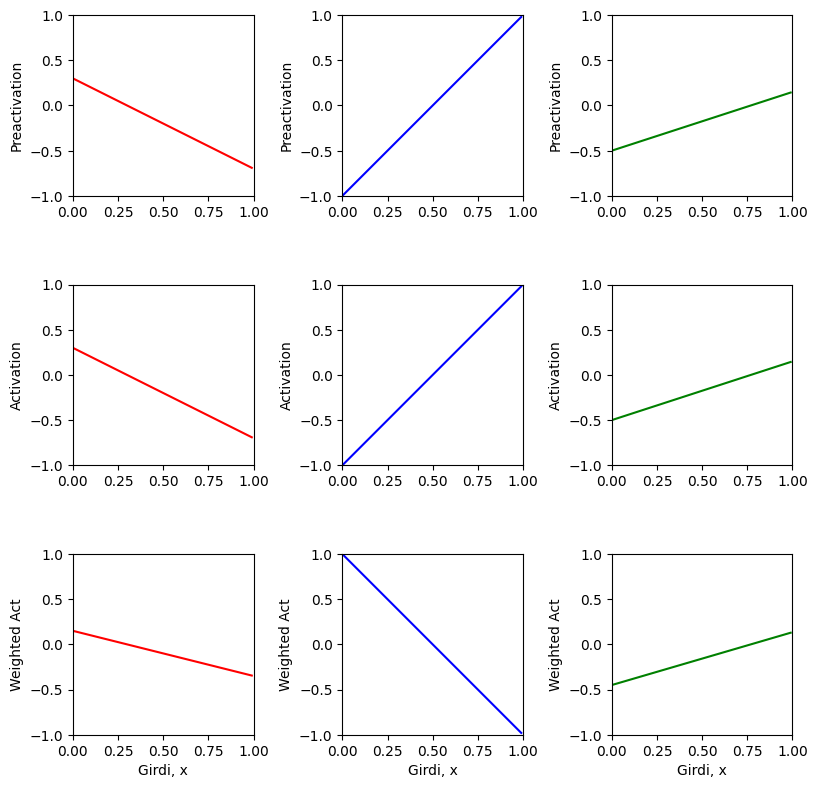

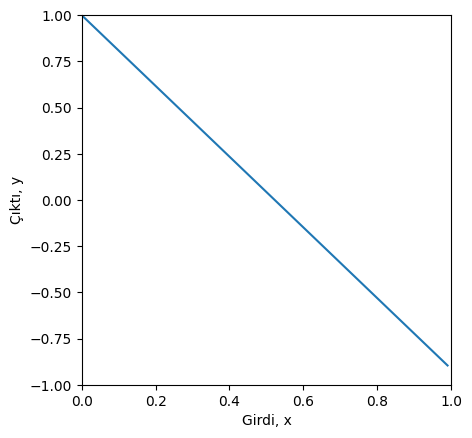

In [26]:
# TODO
# 1. Yukarıdaki doğrusal (linear) aktivasyon fonksiyonu sadece girdiyi geri döndürüyor: (0+1*z) = z
# Kodu çalıştırmadan önce çizimdeki 10 panelin nasıl görüneceğini tahmin et.
# Kodu çalıştırdıktan sonra tahminin doğru mu kontrol et.
# Bu ağ hangi tür (familya) fonksiyonları temsil edebilir?

# 2. a ve b parametrelerini değiştirirsen ne olur?
# Örneğin a=0.5, b=-0.4 dene. lin fonksiyonundaki değerleri değiştirip hücreyi yeniden çalıştır.

# Gizli katmandaki nöronların parametreleri (bias ve ağırlıklar)
theta_10 =  0.3 ; theta_11 = -1.0   # 1. nöron
theta_20 = -1.0 ; theta_21 =  2.0   # 2. nöron
theta_30 = -0.5 ; theta_31 =  0.65  # 3. nöron

# Çıkış katmanının parametreleri (bias ve ağırlıklar)
phi_0 = 0.3      # çıkış bias değeri
phi_1 = 0.5      # 1. nöronun katkısının katsayısı
phi_2 = -1.0     # 2. nöronun katkısının katsayısı
phi_3 = 0.9      # 3. nöronun katkısının katsayısı

# Girdi aralığı tanımlanıyor (0'dan 1'e kadar 0.01 artışlarla)
x = np.arange(0,1,0.01)

# Sinir ağı her x değeri için çalıştırılıyor
# Burada aktivasyon fonksiyonu olarak lin (doğrusal fonksiyon) kullanılıyor
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, lin,
                  phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11,
                  theta_20, theta_21,
                  theta_30, theta_31)

# Sonuçlar çizdiriliyor
# plot_all=True olduğu için 9 panel çizilecek:
# 1. satır: preactivation (gizli katman girişleri)
# 2. satır: activation (doğrusal olduğu için preactivation ile aynı)
# 3. satır: weighted activation (her biri ağırlıkla çarpılmış hali)
# Ayrıca altta genel çıktı (y) grafiği de gösterilir.
plot_neural(x, y, pre_1, pre_2, pre_3,
            act_1, act_2, act_3,
            w_act_1, w_act_2, w_act_3,
            plot_all=True)
